# Part 5: Analyze Your Untappd Check-in Data

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, json, math, random
from mpl_toolkits.basemap import Basemap
from dateutil import parser as date_parser
%matplotlib inline

In [2]:
df = pd.read_csv('data/untappd_details_geocoded_timezone.csv', encoding='utf-8')
df['date_pacific_tz'] = df['date_pacific_tz'].map(lambda x: date_parser.parse(x))
df['date_local_tz'] = df['date_local_tz'].map(lambda x: date_parser.parse(x))
df.head()

,date_pacific_tz,beer_name,beer_style,brewery_name,brewery_place,brewery_type,rating,beer_avg_rating,brewery_avg_rating,beer_abv,...,venue_lon,venue_total_checkins,checkin_id,beer_url,brewery_url,venue_url,brewery_lat,brewery_lon,venue_timezone,date_local_tz
0,2016-08-08 12:44:47-07:00,51st State Pale Ale,Pale Ale - American,Klamath Basin Brewing,"Klamath Falls, OR United States",Micro Brewery,4.00,3.46,3.56,5.20,...,-121.777,1660.0,346221201,https://untappd.com/b/klamath-basin-brewing-51...,https://untappd.com/w/klamath-basin-brewing/2600,https://untappd.com/v/klamath-basin-brewing-co...,42.224867,-121.781670,America/Los_Angeles,2016-08-08 12:44:47-07:00
1,2016-08-07 19:05:36-07:00,Depave IPA,IPA - American,McMenamins,"Portland, OR United States",Micro Brewery,4.00,3.60,3.60,7.22,...,-122.630,5065.0,346107123,https://untappd.com/b/mcmenamins-depave-ipa/11...,https://untappd.com/w/mcmenamins/3674,https://untappd.com/v/mcmenamins-kennedy-schoo...,45.523062,-122.676482,America/Los_Angeles,2016-08-07 19:05:36-07:00
2,2016-08-06 22:51:04-07:00,Grevensteiner Landbier,Kellerbier / Zwickelbier,Brauerei Veltins,"59872 Meschede, NW Germany",Micro Brewery,3.00,3.46,3.16,5.20,...,-122.637,3757.0,345728322,https://untappd.com/b/brauerei-veltins-grevens...,https://untappd.com/w/brauerei-veltins/207,https://untappd.com/v/stammtisch/1596315,51.329257,8.257541,America/Los_Angeles,2016-08-06 22:51:04-07:00
3,2016-08-06 20:22:14-07:00,503 IPA,IPA - American,Migration Brewing,"Portland, OR United States",Micro Brewery,4.25,3.85,3.65,7.30,...,-122.636,9025.0,345683595,https://untappd.com/b/migration-brewing-503-ip...,https://untappd.com/w/migration-brewing/4838,https://untappd.com/v/migration-brewing/10357,45.523062,-122.676482,America/Los_Angeles,2016-08-06 20:22:14-07:00
4,2016-08-06 20:21:53-07:00,ISA Got Back,IPA - Session / India Session Ale,Migration Brewing,"Portland, OR United States",Micro Brewery,3.75,3.76,3.65,4.40,...,-122.636,9025.0,345683439,https://untappd.com/b/migration-brewing-isa-go...,https://untappd.com/w/migration-brewing/4838,https://untappd.com/v/migration-brewing/10357,45.523062,-122.676482,America/Los_Angeles,2016-08-06 20:21:53-07:00


In [3]:
len(df)

1540

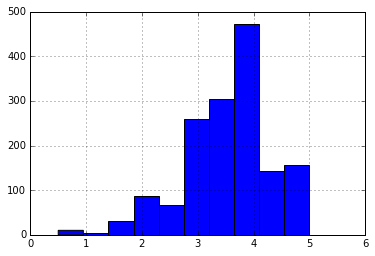

In [4]:
ax = df['rating'].hist()

In [5]:
df['beer_brewery'] = df['beer_name'] + ' | ' + df['brewery_name']

In [6]:
unique_beers = df.drop_duplicates(['beer_name', 'brewery_name'])

In [7]:
# the beers i hated the most
df.sort_values('rating', ascending=True)[['beer_name', 'brewery_name', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,rating
744,Bud Light,Anheuser-Busch,0.5
389,Coors Light,Coors Brewing Company,0.5
1036,Brahma Malzbier,Ambev,0.5
1335,Natural Light,Anheuser-Busch,0.5
1055,Bud Light Lime Cran-Brrr-Rita,Anheuser-Busch,0.5
583,Bitburger Drive,Bitburger Braugruppe,0.5
562,Virgin Craft Brewed Lager,MADD Virgin Drinks,0.5
1440,Goldbräu / Stiegl Beer,Stieglbrauerei zu Salzburg,1.0
1454,Tecate,Cervecería Cuauhtémoc Moctezuma S.A. de C.V.,1.0
1476,Miller Lite,Miller Brewing Company,1.0


In [8]:
# the beers i loved the most
df.sort_values('rating', ascending=False)[['beer_name', 'brewery_name', 'rating']].drop_duplicates().head(25)

,beer_name,brewery_name,rating
1410,Pabst Blue Ribbon,Pabst Brewing Company,5.00
954,Fresh Squeezed IPA,Deschutes Brewery,5.00
987,Blind Pig IPA,Russian River Brewing Company,5.00
155,Hop Knot,Four Peaks Brewing Company,5.00
1246,Proving Ground IPA,Magnolia Brewing Company,5.00
1473,Dragoon IPA,Dragoon Brewing Company,5.00
689,Pale Ale,Sierra Nevada Brewing Co.,5.00
174,Hofbräu Original,Staatliches Hofbräuhaus München,5.00
721,Summer Solstice,Anderson Valley Brewing Company,5.00
597,Pliny the Younger,Russian River Brewing Company,5.00


In [9]:
# the beers i've had that the public has loved the most
df.sort_values('beer_avg_rating', ascending=False)[['beer_name', 'brewery_name', 'beer_avg_rating', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,beer_avg_rating,rating
596,Pliny the Younger (2015),Russian River Brewing Company,4.71,5.00
597,Pliny the Younger,Russian River Brewing Company,4.70,5.00
1434,Pliny the Elder,Russian River Brewing Company,4.57,5.00
995,Vintage (Barrel No 144) (2010),Brouwerij Rodenbach,4.37,4.00
161,Sucaba,Firestone Walker Brewing Company,4.37,3.75
1364,Stone Enjoy By 04.01.13 IPA,Stone Brewing,4.35,4.50
421,Hop Venom,Boneyard Beer Company,4.20,3.75
1433,Blind Pig IPA,Russian River Brewing Company,4.20,5.00
750,Xocoveza Mocha Stout,Stone Brewing,4.16,2.00
1057,Drew Curtis / Wil Wheaton / Greg Koch Stone Fa...,Stone Brewing,4.14,2.50


In [10]:
# the beers i've had that the public has hated the most
df.sort_values('beer_avg_rating', ascending=True)[['beer_name', 'brewery_name', 'beer_avg_rating', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,beer_avg_rating,rating
562,Virgin Craft Brewed Lager,MADD Virgin Drinks,1.15,0.50
578,St. Pauli Girl NA,Brauerei Beck,1.97,2.00
1335,Natural Light,Anheuser-Busch,1.98,0.50
801,Big Flats 1901,"Winery Exchange, World Brews",2.08,1.50
1036,Brahma Malzbier,Ambev,2.14,0.50
541,Dali V8,Dali Beer Group,2.17,2.25
1035,Skol,Ambev,2.19,2.00
583,Bitburger Drive,Bitburger Braugruppe,2.20,0.50
540,Snow,China Resources Snow Breweries,2.20,2.50
542,Dali V6,Dali Beer Group,2.20,1.75


In [11]:
# beers i've had that the public has checked-in the most
df.sort_values('beer_total_checkins', ascending=False)[['beer_name', 'brewery_name', 'beer_total_checkins', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,beer_total_checkins,rating
370,Guinness Draught,Guinness,1220000.0,4.0
745,Bud Light,Anheuser-Busch,1140000.0,0.5
1476,Miller Lite,Miller Brewing Company,1050000.0,1.0
704,Traditional Lager,Yuengling Brewery,988583.0,3.5
731,Coors Light,Coors Brewing Company,918163.0,0.5
171,IPA,Lagunitas Brewing Company,823752.0,4.0
1053,Two Hearted Ale,Bell's Brewery,806358.0,3.0
854,Heineken,Heineken,751528.0,3.0
471,Pabst Blue Ribbon,Pabst Brewing Company,734217.0,5.0
1138,Belgian White,Blue Moon Brewing Company,716791.0,3.0


In [12]:
# places i've checked into that the public has checked into the most
df.sort_values('venue_total_checkins', ascending=False)[['venue_name', 'venue_place', 'venue_total_checkins']].drop_duplicates('venue_name').head(10)

,venue_name,venue_place,venue_total_checkins
1160,Russian River Brewing Company,"725 4th St Santa Rosa, CA",185014.0
753,Stone Brewing World Bistro & Gardens,"1999 Citracado Pkwy Escondido, CA",99953.0
1069,Lagunitas Brewing Company,"1280 N McDowell Blvd Petaluma, CA",60887.0
218,Toronado,"4026 30th St San Diego, CA",54936.0
794,Arizona Wilderness Brewing Co.,"721 N Arizona Ave Gilbert, AZ",50889.0
196,Beer Revolution,"464 3rd St Oakland, CA",47586.0
1080,City Beer Store,"1168 Folsom St San Francisco, CA",44197.0
769,The Rare Barrel,"940 Parker Street Berkeley, CA",39727.0
1463,Pizza Port Brewing Company,"1956 Bacon St San Diego, CA",34997.0
1186,APEX,"1216 SE Division St Portland, OR",32270.0


In [13]:
# what styles have i had the most?
df['beer_style'].value_counts().head(10)

IPA - American                       289
Pale Ale - American                  162
Lager - North American Adjunct       126
Lager - Pale                          79
Pilsner - German                      67
Pilsner - Other                       60
Pilsner - Czech                       47
IPA - Session / India Session Ale     42
Red Ale - American Amber / Red        40
IPA - Imperial / Double               37
Name: beer_style, dtype: int64

In [14]:
# what basic styles have i had the most?
df['beer_style'].map(lambda x: str(x).split(' - ')[0]).value_counts().head(10)

IPA                  401
Lager                318
Pale Ale             193
Pilsner              174
Red Ale               50
Kölsch                35
California Common     23
Golden Ale            22
Strong Ale            18
Cream Ale             18
Name: beer_style, dtype: int64

In [15]:
# what beers have i checked-in the most?
df['beer_brewery'].value_counts().head(10)

Pabst Blue Ribbon | Pabst Brewing Company             45
Pale Ale | Sierra Nevada Brewing Co.                  21
Hop Knot | Four Peaks Brewing Company                 17
Anchor Steam Beer | Anchor Brewing Company            17
Trumer Pils | Trumer                                  17
IPA | Lagunitas Brewing Company                       15
Hamm's Premium | Miller Brewing Company               11
Kölsch | Jupiter                                      11
Kilt Lifter | Four Peaks Brewing Company              10
Hofbräu Original | Staatliches Hofbräuhaus München    10
Name: beer_brewery, dtype: int64

In [16]:
# what breweries have i checked into the most?
df['brewery_name'].value_counts().head(10)

Sierra Nevada Brewing Co.          73
Pabst Brewing Company              56
Four Peaks Brewing Company         56
Lagunitas Brewing Company          45
Deschutes Brewery                  35
Jupiter                            33
Ninkasi Brewing Company            22
Anchor Brewing Company             22
SanTan Brewing Company             19
Anderson Valley Brewing Company    18
Name: brewery_name, dtype: int64

In [17]:
# what breweries have i had the greatest number of unique beers from?
unique_beers['brewery_name'].value_counts().head(10)

Sierra Nevada Brewing Co.      39
Lagunitas Brewing Company      26
Deschutes Brewery              17
Four Peaks Brewing Company     15
Fieldwork Brewing Company      14
Ninkasi Brewing Company        13
Stone Brewing                  13
SanTan Brewing Company         12
New Belgium Brewing Company    11
Jupiter                         9
Name: brewery_name, dtype: int64

In [18]:
# what unique beers have i had from four peaks?
unique_beers[unique_beers['brewery_name']=='Four Peaks Brewing Company'][['date_local_tz', 'beer_name', 'rating']]

,date_local_tz,beer_name,rating
151,2016-05-02 20:17:30-07:00,Gumleaf Schooner,4.50
152,2016-05-02 19:23:14-07:00,Short Hop,4.50
155,2016-05-01 19:05:37-07:00,Hop Knot,5.00
157,2016-05-01 16:39:45-07:00,8th Street Pale Ale,4.00
294,2015-12-26 23:03:33-07:00,Raj IPA,4.00
297,2015-12-26 19:24:05-07:00,White Ale,2.75
309,2015-12-22 23:01:59-07:00,Double Knot,4.00
375,2015-10-03 14:51:03-07:00,Lefty's Lager,3.75
376,2015-10-03 14:49:41-07:00,Western Rivers English Summer Ale,3.75
377,2015-10-03 14:01:10-07:00,Single Tank Series: Hoppy Pils,4.50


## Look at hour and day of the week

In [19]:
df['date_local_tz'].map(lambda x: x.hour).value_counts()

20    204
19    188
18    163
21    160
22    124
17    122
16    102
14    100
15     94
13     78
23     73
12     61
0      25
1      13
11     12
9       7
8       4
10      3
7       3
3       2
2       2
Name: date_local_tz, dtype: int64

In [20]:
df['date_local_tz'].map(lambda x: x.weekday()).value_counts()

5    396
4    294
6    224
3    194
2    155
0    155
1    122
Name: date_local_tz, dtype: int64

## Map the breweries I have tried

In [21]:
df_breweries = df[[col for col in df.columns if 'brewery_' in col]]
df_breweries = df_breweries.drop_duplicates(['brewery_name', 'brewery_place'])
df_breweries = df_breweries.dropna(subset=['brewery_lat', 'brewery_lon'], how='any')
print(len(df_breweries))
df_breweries.head()

454


,brewery_name,brewery_place,brewery_type,brewery_avg_rating,brewery_total_checkins,brewery_url,brewery_lat,brewery_lon
0,Klamath Basin Brewing,"Klamath Falls, OR United States",Micro Brewery,3.56,15694.0,https://untappd.com/w/klamath-basin-brewing/2600,42.224867,-121.781670
1,McMenamins,"Portland, OR United States",Micro Brewery,3.60,164860.0,https://untappd.com/w/mcmenamins/3674,45.523062,-122.676482
2,Brauerei Veltins,"59872 Meschede, NW Germany",Micro Brewery,3.16,58636.0,https://untappd.com/w/brauerei-veltins/207,51.329257,8.257541
3,Migration Brewing,"Portland, OR United States",Micro Brewery,3.65,18936.0,https://untappd.com/w/migration-brewing/4838,45.523062,-122.676482
9,Barley Brown's Beer,"Baker City, OR United States",Micro Brewery,3.97,75429.0,https://untappd.com/w/barley-brown-s-beer/7046,44.774875,-117.834385


In [22]:
def random_in_range(lower_range, upper_range):
    return random.random() * (upper_range - lower_range) + lower_range

# jitter either a lat or a long within n kms of original
def jitter(val, kms=1):
    rad_Earth = 6378.16
    one_degree = (2 * math.pi * rad_Earth) / 360
    one_km = 1 / one_degree
    return random_in_range(val - (kms * one_km), val + (kms * one_km))

# jitter a lat-long coordinate pair within n kms of the original location
def jitter_lat_lon(lat, lon, kms=1):
    new_lat = jitter(lat)
    new_lon = jitter(lon)
    return new_lat, new_lon

# demonstrate
print(jitter_lat_lon(34.052234, -118.243685))
print(jitter(34.052234))

(34.052499390063616, -118.24570512336787)
34.05634564882447


In [23]:
df_breweries['brewery_lat'] = df_breweries['brewery_lat'].map(jitter)
df_breweries['brewery_lon'] = df_breweries['brewery_lon'].map(jitter)

In [24]:
# define map colors
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#eaeaea'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

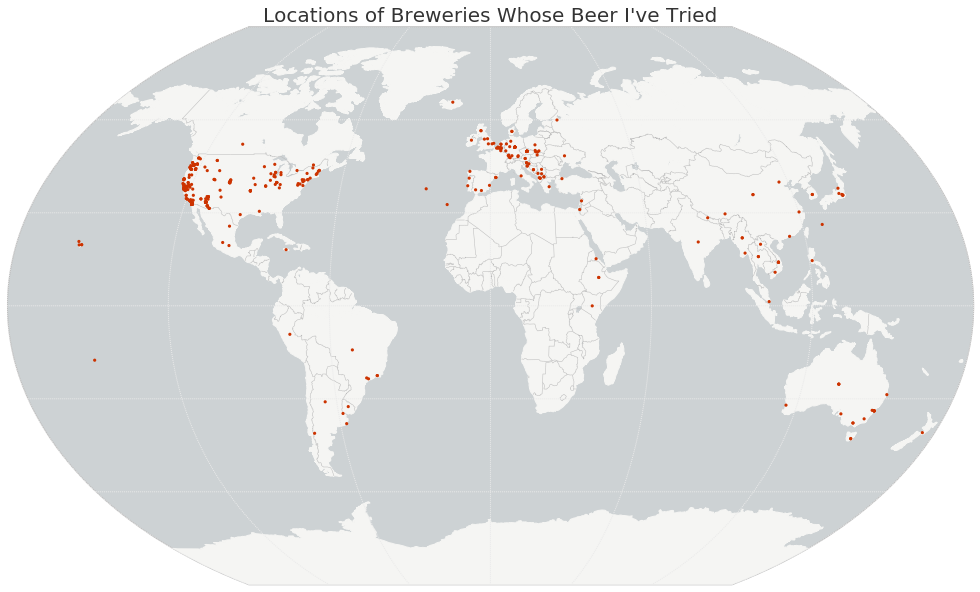

In [25]:
# create the plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, axisbg='#ffffff', frame_on=False)
ax.set_title('Locations of Breweries Whose Beer I\'ve Tried', fontsize=20, color='#333333')

# draw the basemap and its features
m = Basemap(projection='kav7', lon_0=0, resolution='l', area_thresh=10000)
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

# project our points and scatter plot them
x, y = m(df_breweries['brewery_lon'].values, df_breweries['brewery_lat'].values)
m.scatter(x, y, s=10, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=3)

# show the map
plt.savefig('images/brewery_location_world_map.png', dpi=180, bbox_inches='tight', pad_inches=0.2)
plt.show()

## Leaflet

In [26]:
# determine how many times each place appears in dataset, and break latlng into discrete lat and long
place_counts = df_breweries['brewery_place'].value_counts()
df_breweries['place_count'] = df_breweries['brewery_place'].map(lambda x: place_counts[x])

In [27]:
# create html list of artists from each place
features = []
for brewery_place in df_breweries['brewery_place'].unique():
    
    # how many breweries to show before saying "...and n more"
    num_to_show = 3
    line_break = '<br />'
    breweries = ''
    
    place_count = place_counts[brewery_place]
    names = df_breweries[df_breweries['brewery_place']==brewery_place]['brewery_name']
    
    if place_count <= num_to_show:
        for name in names:
            breweries = '{}{}{}'.format(breweries, name, line_break)
            
    else:
        for name in names[0:num_to_show]:
            breweries = '{}{}{}'.format(breweries, name, line_break)
        breweries = '{}...and {} more'.format(breweries, place_count - num_to_show)
        
    features.append([brewery_place, breweries])

df_leaflet = pd.DataFrame(features, columns=['brewery_place', 'breweries'])
df_leaflet.head()

,brewery_place,breweries
0,"Klamath Falls, OR United States",Klamath Basin Brewing<br />
1,"Portland, OR United States",McMenamins<br />Migration Brewing<br />Laurelw...
2,"59872 Meschede, NW Germany",Brauerei Veltins<br />
3,"Baker City, OR United States",Barley Brown's Beer<br />
4,"Eugene, OR United States",Hop Valley Brewing Company<br />ColdFire<br />...


In [28]:
# add lat and long back to the dataframe
place_lat_lon = {}
df_unique = df_breweries[['brewery_place', 'brewery_lat', 'brewery_lon']].drop_duplicates(subset='brewery_place')
for label in df_unique.index:
    place_lat_lon[df_unique.loc[label, 'brewery_place']] = (df_unique.loc[label, 'brewery_lat'], df_unique.loc[label, 'brewery_lon'])
    
df_leaflet['brewery_lat'] = df_leaflet['brewery_place'].map(lambda x: place_lat_lon[x][0])
df_leaflet['brewery_lon'] = df_leaflet['brewery_place'].map(lambda x: place_lat_lon[x][1])
df_leaflet.head()

,brewery_place,breweries,brewery_lat,brewery_lon
0,"Klamath Falls, OR United States",Klamath Basin Brewing<br />,42.219473,-121.779951
1,"Portland, OR United States",McMenamins<br />Migration Brewing<br />Laurelw...,45.523104,-122.677599
2,"59872 Meschede, NW Germany",Brauerei Veltins<br />,51.335382,8.255269
3,"Baker City, OR United States",Barley Brown's Beer<br />,44.766241,-117.836976
4,"Eugene, OR United States",Hop Valley Brewing Company<br />ColdFire<br />...,44.047314,-123.079532


In [29]:
# function to write the dataframe out to geojson
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [30]:
geojson = df_to_geojson(df_leaflet, df_leaflet.columns, lat='brewery_lat', lon='brewery_lon')

# save the geojson result to a file
output_filename = 'leaflet/untappd-brewery-dataset.js'
with open(output_filename, 'w') as output_file:
    output_file.write('var dataset = {};'.format(json.dumps(geojson)))
    
# how many features did we save to the geojson file?
print('{:,} geotagged features saved to file'.format(len(geojson['features'])))

278 geotagged features saved to file
